In [1]:
from glob import glob
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMG_ROWS = 64
IMG_COLS = 64
IMG_CHANNELS = 3
CLASSES = 2         # mountain, sea

In [13]:
# Load dataset
def load_images_and_labels(files, label):
    images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in files]
    labels = [label] * len(files)
    return images, labels

mountain_files = glob('/content/drive/MyDrive/Samples/crawling/m_mountain/*')
sea_files = glob('/content/drive/MyDrive/Samples/crawling/s_sea/*')

mountain_images, mountain_labels = load_images_and_labels(mountain_files, 0)    # label mountain as 0
sea_images, sea_labels = load_images_and_labels(sea_files, 1)                   # label sea as 1

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (109542160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [14]:
# Concatenate mountain datasets and sea datasets
images = mountain_images + sea_images
labels = mountain_labels + sea_labels

In [16]:
# Vectorize the images
image_vectors = np.asarray([image.img_to_array(img) for img in images])

In [17]:
# Normalize the image vectors
image_vectors = image_vectors / 255

In [18]:
# Convert to categorical labels
labels = to_categorical(labels, 2)

In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(image_vectors, labels, test_size=0.2, random_state=42)

In [20]:
# Define the convnet
def build_model(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    return model

In [21]:
# Build model
model = build_model((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

In [25]:
# Compile
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [26]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 [==============================] - 2s 360ms/step - loss: 1.8613 - accuracy: 0.5035 - val_loss: 0.9505 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 424ms/step - loss: 0.9367 - accuracy: 0.5312 - val_loss: 0.7230 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 264ms/step - loss: 0.6794 - accuracy: 0.5833 - val_loss: 0.9649 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 325ms/step - loss: 0.8687 - accuracy: 0.5104 - val_loss: 0.6582 - val_accuracy: 0.6250
Epoch 5/50
3/3 [==============================] - 1s 415ms/step - loss: 0.6304 - accuracy: 0.7153 - val_loss: 0.6470 - val_accuracy: 0.4688
Epoch 6/50
3/3 [==============================] - 1s 382ms/step - loss: 0.6650 - accuracy: 0.5556 - val_loss: 0.6609 - val_accuracy: 0.6250
Epoch 7/50
3/3 [==============================] - 1s 408ms/step - loss: 0.6183 - accuracy: 0.6667 - val_loss: 0.6325 - val_accuracy: 0.7188
Epoch 8/50
3/3 [====

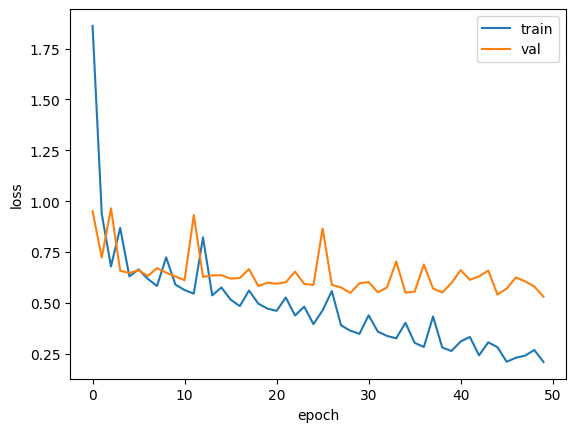

In [27]:
# Visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

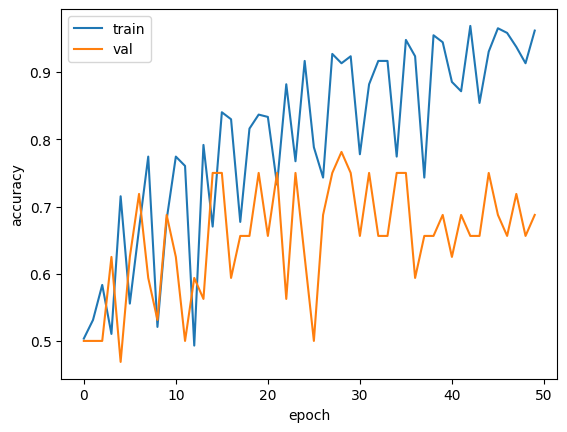

In [28]:
# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [29]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

3/3 [==============================] - 0s 32ms/step - loss: 0.5797 - accuracy: 0.7037
Test loss: 0.5797
Test accuracy: 0.7037
